In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import DateOffset

In [3]:

sns.set(style="whitegrid")
data = pd.read_csv('Dispensaries.csv')

data['Expire Date'] = pd.to_datetime(data['Expire Date'], format='%m/%d/%y', errors='coerce')
data['Effective Date'] = pd.to_datetime(data['Effective Date'], format='%m/%d/%y', errors='coerce')

standard_license_duration = pd.DateOffset(years=1)
data['estimated_effective_date'] = data.apply(
    lambda row: row['Expire Date'] - standard_license_duration if pd.isnull(row['Effective Date']) else row['Effective Date'], 
    axis=1
)
data.dropna(subset=['estimated_effective_date'], inplace=True)
data['year'] = data['estimated_effective_date'].dt.year.astype(int)
license_count_per_year = data.groupby('year').size()
print(license_count_per_year)

year
2016    157
2017    338
2018    142
2019    118
2020    132
2021    243
2022    419
2023    639
dtype: int64


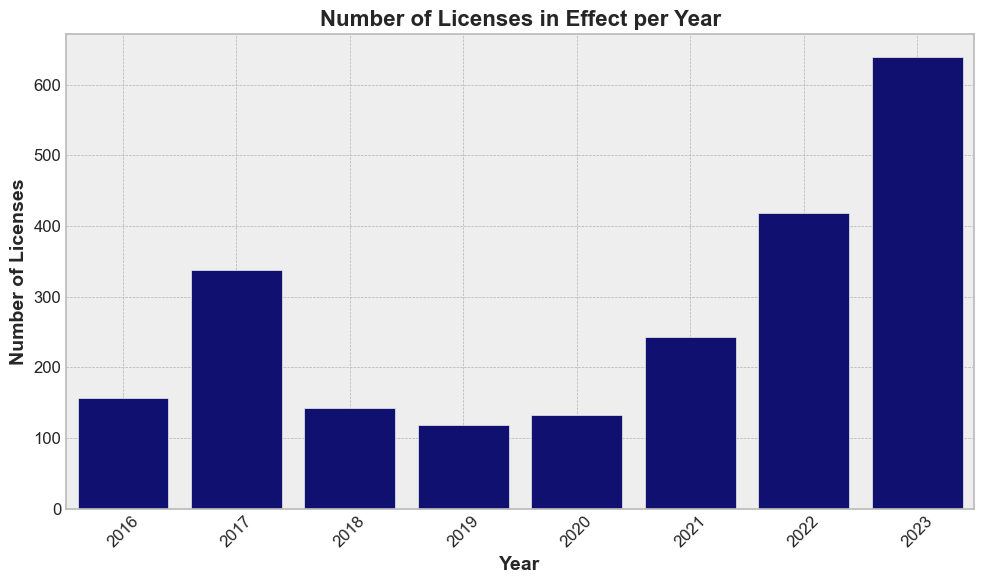

In [5]:
#Bar graph for dispo growth over time
plt.style.use('bmh')
plt.figure(figsize=(10, 6))
sns.barplot(x=license_count_per_year.index.astype(str), y=license_count_per_year.values, color='navy')
plt.title('Number of Licenses in Effect per Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Licenses', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('licenses_by_year.png', dpi=300)
plt.show()

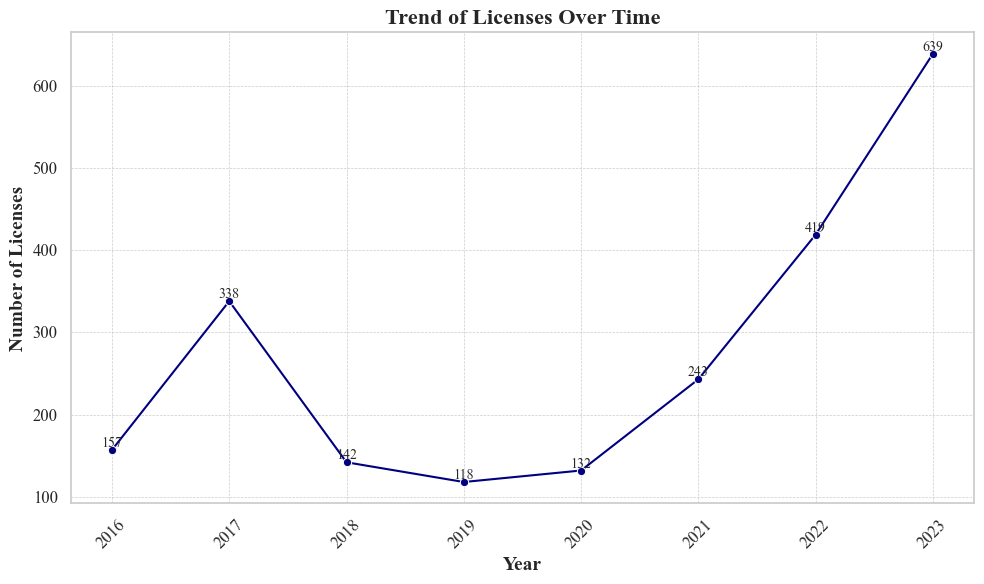

In [13]:
sns.set(style="whitegrid")

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.figure(figsize=(10, 6))
sns.lineplot(x=license_count_per_year.index, y=license_count_per_year.values, color='navy', marker='o')
plt.title('Trend of Licenses Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Licenses', fontsize=14, fontweight='bold')
plt.xticks(license_count_per_year.index, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
for year, count in license_count_per_year.items():
    plt.text(year, count, f'{count}', fontsize=10, ha='center', va='bottom')
plt.tight_layout()
plt.savefig('license_trend_overtime.png', dpi=300)
plt.show()

<Figure size 1000x600 with 0 Axes>

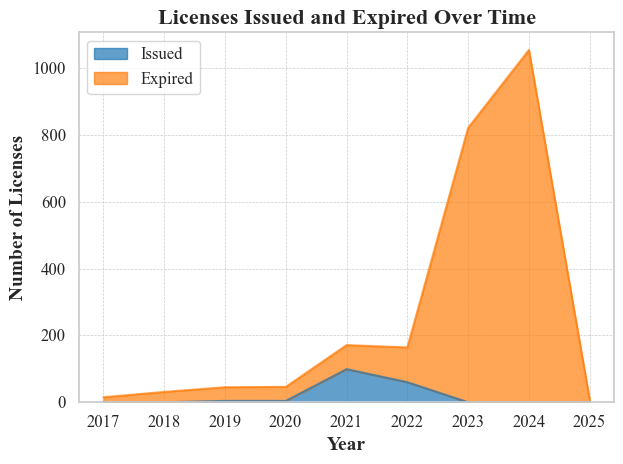

In [12]:
data['Issue Date'] = pd.to_datetime(data['Issue Date'], errors='coerce')
data['Expire Date'] = pd.to_datetime(data['Expire Date'], errors='coerce')

data['Issue Year'] = data['Issue Date'].dt.year
data['Expire Year'] = data['Expire Date'].dt.year

issued_per_year = data['Issue Year'].value_counts().sort_index()
expired_per_year = data['Expire Year'].value_counts().sort_index()
time_series_data = pd.DataFrame({'Issued': issued_per_year, 'Expired': expired_per_year}).fillna(0)

sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

plt.figure(figsize=(10, 6))
time_series_data.plot(kind='area', stacked=True, alpha=0.7, colors=['#1f77b4', '#ff7f0e'])
plt.title('Licenses Issued and Expired Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Licenses', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.savefig('Licenses_IssuedandExpired_Overtime.png', dpi=300)
plt.show()

/var/folders/_z/1gplcjmj1x94xkk56m0c52sr0000gn/T/ipykernel_62804/3886712154.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_state.index, y=avg_rating_by_state.values, palette='viridis')


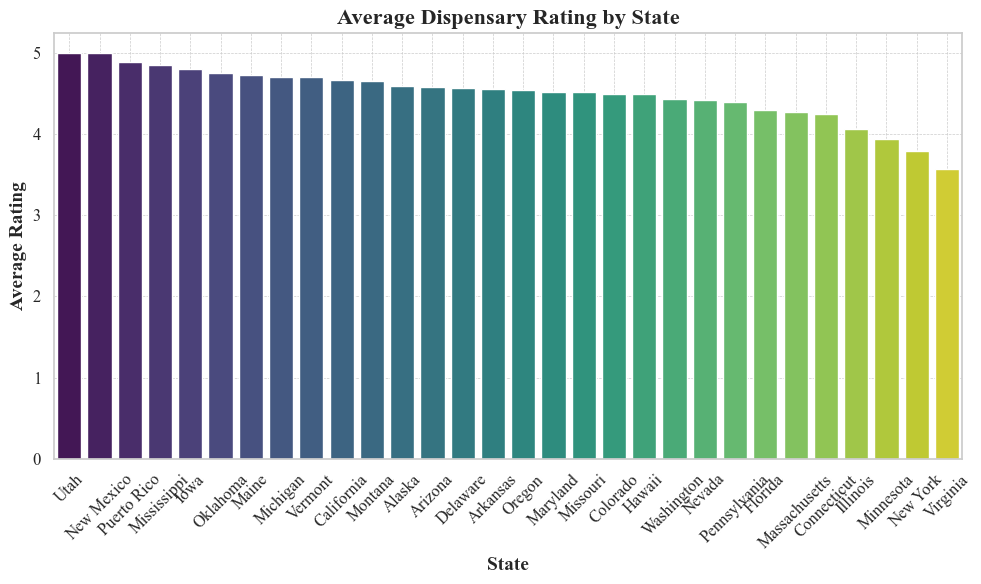

In [39]:
data = pd.read_csv("stores_data.csv")

#AVERAGE RATINGS BY STATE
import us

def extract_state(address):
    parts = address.split(',')
    if len(parts) < 2:
        return None
    state_part = parts[-2].strip()
    zip_part = parts[-1].strip().split(' ')[0]
    state = us.states.lookup(state_part) or us.states.lookup(zip_part)
    return state.name if state else None

data['State'] = data['Address'].apply(extract_state)
states_to_remove = ['Louisiana', 'Georgia', 'Ohio']
data = data[~data['State'].isin(states_to_remove)]

# Now recalculate avg_rating_by_state with the corrected state information
avg_rating_by_state = data.groupby('State')['Avg Rating'].mean().sort_values(ascending=False)

avg_rating_by_state_sorted = avg_rating_by_state.sort_values()
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_by_state.index, y=avg_rating_by_state.values, palette='viridis')
plt.title('Average Dispensary Rating by State', fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=14, fontweight='bold')
plt.ylabel('Average Rating', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('Average_Rating_by_State.png', dpi=300)
plt.show()

In [65]:
#Regression on average number of reviews as a function of tax rate
import pandas as pd
import us

#Merging legalization data with dispensary-level data
legalization_data = pd.read_csv('legalization_data.txt', delimiter=',', 
                                parse_dates=['legalization_date', 'licensed_sales_since_date'])
legalization_data.rename(columns={'state': 'State'}, inplace=True)

dispensary_data = pd.read_csv('stores_data.csv')
def extract_state(address):
    parts = address.split(',')
    if len(parts) < 2:
        return None
    state_part = parts[-2].strip()
    zip_part = parts[-1].strip().split(' ')[0]
    state = us.states.lookup(state_part) or us.states.lookup(zip_part)
    return state.name if state else None
dispensary_data['State'] = dispensary_data['Address'].apply(extract_state)
states_to_remove = ['Louisiana', 'Georgia', 'Ohio']
dispensary_data = dispensary_data[~dispensary_data['State'].isin(states_to_remove)]
combined_data = dispensary_data.merge(legalization_data, on='State', how='left')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


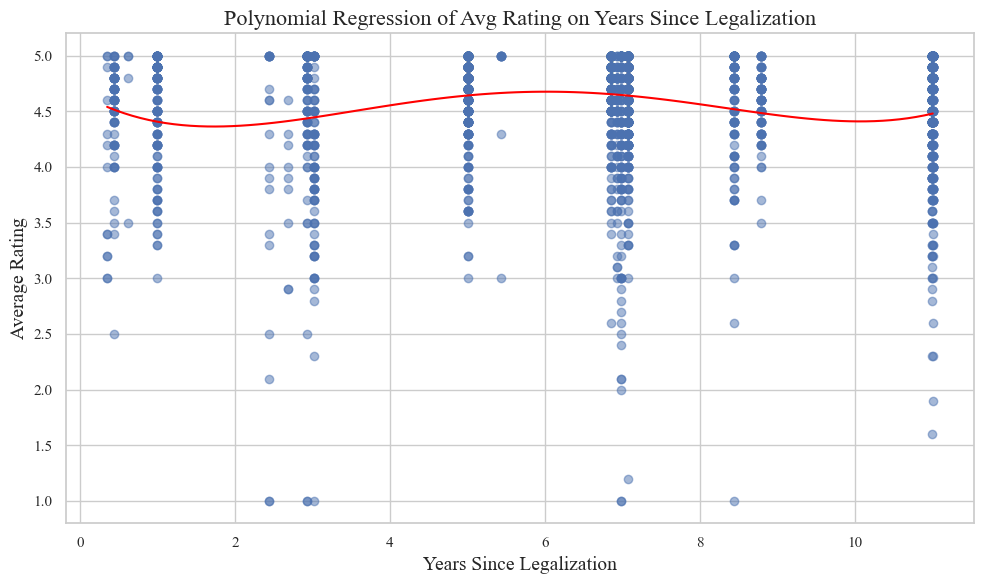

In [84]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

current_date = dt.datetime.now()
combined_data['years_since_legalization'] = (current_date - combined_data['legalization_date']).dt.days / 365.25
combined_data['Avg Rating'] = pd.to_numeric(combined_data['Avg Rating'], errors='coerce')
combined_data.dropna(subset=['Avg Rating', 'years_since_legalization'], inplace=True)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Create polynomial features
degree = 4  # You can adjust the degree based on the complexity you want to capture
polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
linear_regression = LinearRegression()

# Create a pipeline that first creates polynomial features and then fits a linear regression
model = make_pipeline(polynomial_features, linear_regression)

# Fit the model
X = combined_data[['years_since_legalization']].values.reshape(-1, 1)  # Reshape if only one feature
y = combined_data['Avg Rating']
model.fit(X, y)

# Predict over the range of X
X_predict = pd.DataFrame({'years_since_legalization': np.linspace(X.min(), X.max(), 100)})
y_predict = model.predict(X_predict)

# Plot the actual values and the model's predictions
plt.figure(figsize=(10, 6))
plt.scatter(combined_data['years_since_legalization'], combined_data['Avg Rating'], alpha=0.5)  # actual values
plt.plot(X_predict, y_predict, color='red')  # model's predictions

plt.title('Polynomial Regression of Avg Rating on Years Since Legalization', fontsize=16)
plt.xlabel('Years Since Legalization', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig('polynomial_regression.png', dpi=300)
plt.show()

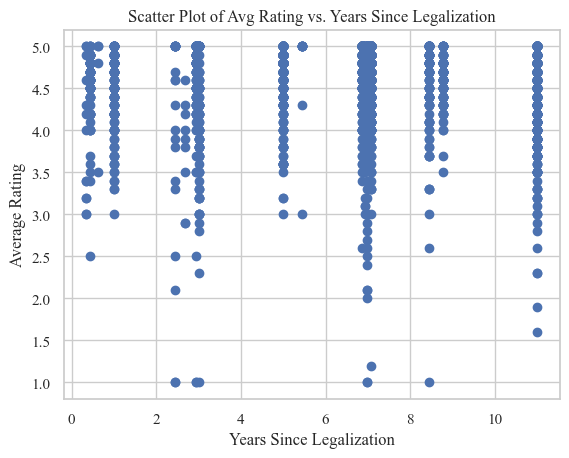

In [77]:
plt.scatter(combined_data['years_since_legalization'], combined_data['Avg Rating'])
plt.xlabel('Years Since Legalization')
plt.ylabel('Average Rating')
plt.title('Scatter Plot of Avg Rating vs. Years Since Legalization')
plt.show()

In [82]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor

# Define the model and run k-fold cross-validation
model = RandomForestRegressor(n_estimators=100, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=1)
scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print(f"Mean RMSE: {rmse_scores.mean():.3f}") # This is the average error across all the folds in the cross-validation. A lower RMSE indicates a better fit of the model to the data. The RMSE is measured in the same units as the dependent variable (in your case, average ratings). So a mean RMSE of 0.483 suggests that on average, the model's predictions deviate from the actual values by 0.483 rating points.
print(f"Standard Deviation of RMSE: {rmse_scores.std():.3f}") #This represents the variability of the model's prediction error across the different folds. A lower standard deviation suggests that the model's performance is consistent across different subsets of the data. In your case, an RMSE standard deviation of 0.032 indicates that the deviation between the folds is relatively small, suggesting that the model's performance is fairly stable across different parts of the dataset.

Mean RMSE: 0.483
Standard Deviation of RMSE: 0.032
